In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import scipy.stats as stats

# NSL 01

In this first notebook, a C++ library for the generation of pseudorandom numbers will be tested  in various ways.

### EX 01_1

In this first exercise, the mean value and the variance of the pseudorandom generator will be calculated making use of the blocking method. Then, the $\chi^2$ test is exploited to undertand if the numbers are drawn from a uniform distribution.

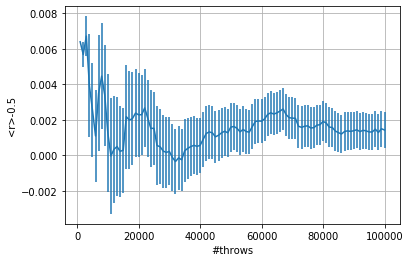

In [11]:
x, ave, err_ave, var, err_var = np.loadtxt("results/ES01_1.txt", usecols=(0,1,2,3,4), delimiter=' ', unpack='true', max_rows=100)
plt.errorbar(x,ave,yerr=err_ave)
plt.xlabel('#throws')
plt.ylabel('<r>-0.5')
plt.grid(True)
plt.show()

The computation of $\langle r \rangle$ has been carried out using the blocking method with a total number of throws $M = 10^5$ and with $N = 100$ blocks. In the blocking method, we consider the $M$ throws split in $N$ blocks. The integral is calculated for each block as the mean value of the function times the width of the interval. The mean value of the function is calculated uniformly sampling the interval $(0,1)$ with $L = M/N = 1000$ points for each block. Then, the mean value and standard deviation of the integral can be evaluated simply using the values of the integral obtained in each block. \
The discrepancy between $\langle r \rangle$ and the expected (analytical) value $\frac{1}{2}$ is represented in the graph as a function of the number of throws with its standard deviation. The graph has been drawn representing the mean value and standard deviation of the integral for an increasing number of blocks involved in the computation. \
It's clear that for a high number of throws the result is compatible with 0 as the distance in terms of sigma is slightly more than 1. As a result, we can conclude that the generator used has a mean value for a high number of throws compatible with $\frac{1}{2}$.

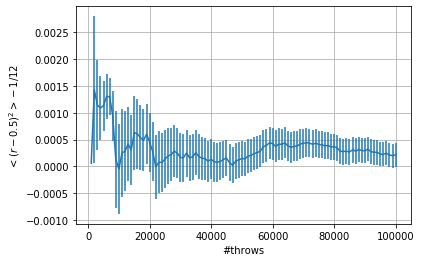

In [12]:
plt.errorbar(x,var,yerr=err_var)
plt.xlabel('#throws')
plt.ylabel('$<(r-0.5)^2>-1/12$')
plt.grid(True)
plt.show()

An analogous calculation has been carried out for the variance $\sigma^2$ of $r$ and its uncertaninty. The blocking method has been applied with the same rationale and parameters as before ($M = 10^5, N = 1000$). \
The expected $\sigma^2$ can be calculated analytically and its value is $\frac{1}{12}$. The graph shows the descrepancy between this value and the variance numerically computed as a function of the number of throws (=number of blocks involved). Again, for a high number of throws the result is in fair accordance with the expected value.

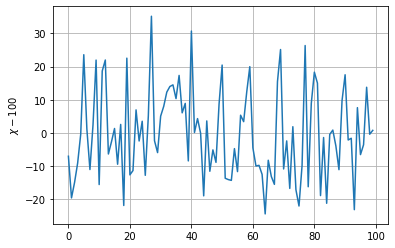

In [13]:
x, chi = np.loadtxt("results/ES01_1.txt", usecols=(0,1), delimiter=' ', unpack='true', skiprows=100)
plt.errorbar(x,chi)
plt.xlabel('')
plt.ylabel('$\chi-100$')
plt.grid(True)
plt.show()

In conclusion, this graph shows 100 computation of $(\chi^2-100)$ using $n = 10^4$ points for each computation. \
For each calculation of $\chi^2$, the interval $(0,1)$ has been divided in $M = 100$ intervals. $n$ points have been uniformly generated in the interval and the number $n_i$ of points in the $i$-th interval has been saved. Then, $\chi^2$ is computed using the formula $\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$. \
The expected value for $\chi^2$ is around $n/M = 100$. In this case we don't have an uncertainty with we which we can compare our results but we can say that, qualitatively, the values for $\chi^2$ are distributed around 100. 

### EX 01_2

In this exercise, new pdf are sampled and the CLT is tested.

In [14]:
unif1, exp1, cauchy1 = np.loadtxt("results/es01_2.txt", usecols=(0,1,2), delimiter=' ', unpack='true', max_rows=10000)
unif2, exp2, cauchy2 = np.loadtxt("results/es01_2.txt", usecols=(0,1,2), delimiter=' ', unpack='true', skiprows=10000)
unif3, exp3, cauchy3 = np.loadtxt("results/es01_2.txt", usecols=(0,1,2), delimiter=' ', unpack='true', skiprows=20000)
unif4, exp4, cauchy4 = np.loadtxt("results/es01_2.txt", usecols=(0,1,2), delimiter=' ', unpack='true', skiprows=30000)
unif = [unif1, unif2, unif3, unif4]
exp = [exp1, exp2, exp3, exp4]
cauchy = [cauchy1, cauchy2, cauchy3, cauchy4]
N = [1,2,10,100]

In the figures below, 3 sets of graphs are shown. Each set is dedicated to one of these distributions: Uniform, Poisson, Cauchy. Each set has 4 histograms, one for each requested value of N. The last histogram of each set is fitted with the expected distribution.

Let's consider one histogram. It is filled with $10^4$ points of the type $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$). In each set, the value $x_i$ is extracted from a different distribution (Uniform, Exponential with $\lambda = 1$, Cauchy with $\mu = 0, \Gamma=1$).

Theoretically, for the central limit theorem, for high N (for the last graph of each set), the histogram should resemble a stable distribution (Gaussian for the first two and Cauchy for the last one). As it can be seen, it's true for all the three sets. It is noticeable that, for the first two, the attractor is a gaussian with the same mean of the extraction pdf and with RMS equals to the one of the extracted pdf divided by $\sqrt{N}$. For the last one the attractor is equal to the pdf of extraction because the Cauhcy pdf has $\sigma = \infty$.


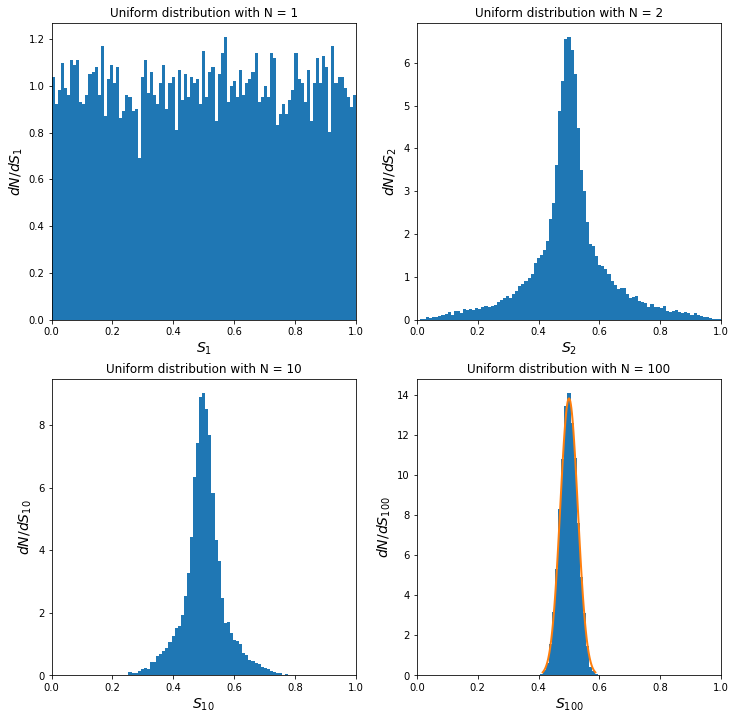

In [15]:
fig, axx = plt.subplots(2, 2,figsize=(12, 12))
axx = axx.reshape(-1)
bins = np.linspace(0.,1.,100)

for k in range(4):
    ax = axx[k]
    ax.hist(unif[k], bins, density = True)
    ax.set_title(f"Uniform distribution with N = {N[k]}")
    ax.set_xlabel(f"$S_{ {N[k]} }$")
    ax.set_ylabel(f"$dN/dS_{ {N[k]} }$")
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    ax.set_xlim(0.,1.)

mu, sigma = 1/2, 1/np.sqrt(12)/10
x = np.linspace(mu-3*sigma,mu+3*sigma,100)
ax.plot(x, stats.norm.pdf(x, mu, sigma), linewidth = 2)

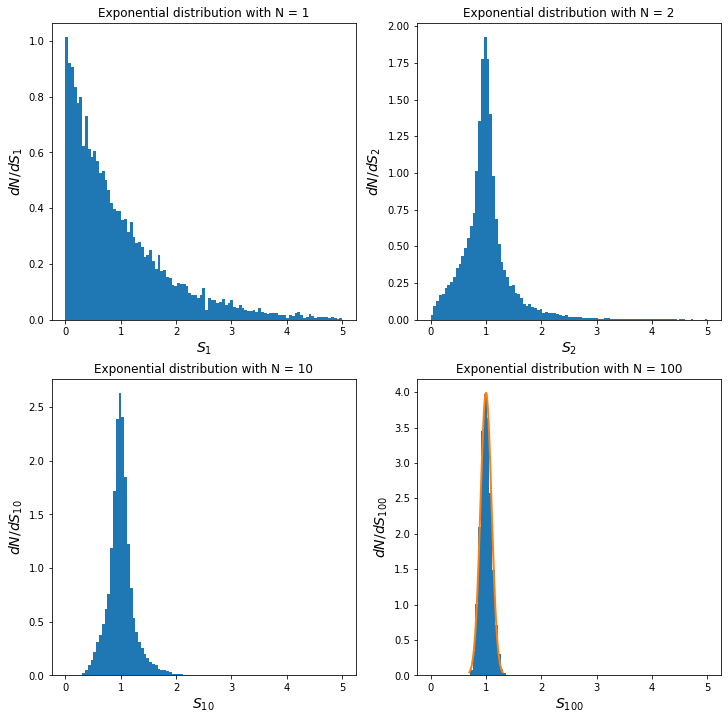

In [16]:
fig, axx = plt.subplots(2, 2,figsize=(12, 12))
axx = axx.reshape(-1)
bins = np.linspace(0.,5,100)

for k in range(4):
    ax = axx[k]
    ax.hist(exp[k], bins, density = True)
    ax.set_title(f"Exponential distribution with N = {N[k]}")
    ax.set_xlabel(f"$S_{ {N[k]} }$")
    ax.set_ylabel(f"$dN/dS_{ {N[k]} }$")
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)

mu, sigma = 1., 1/10
x = np.linspace(mu-3*sigma,mu+3*sigma,100)
ax.plot(x, stats.norm.pdf(x, mu, sigma), linewidth = 2)

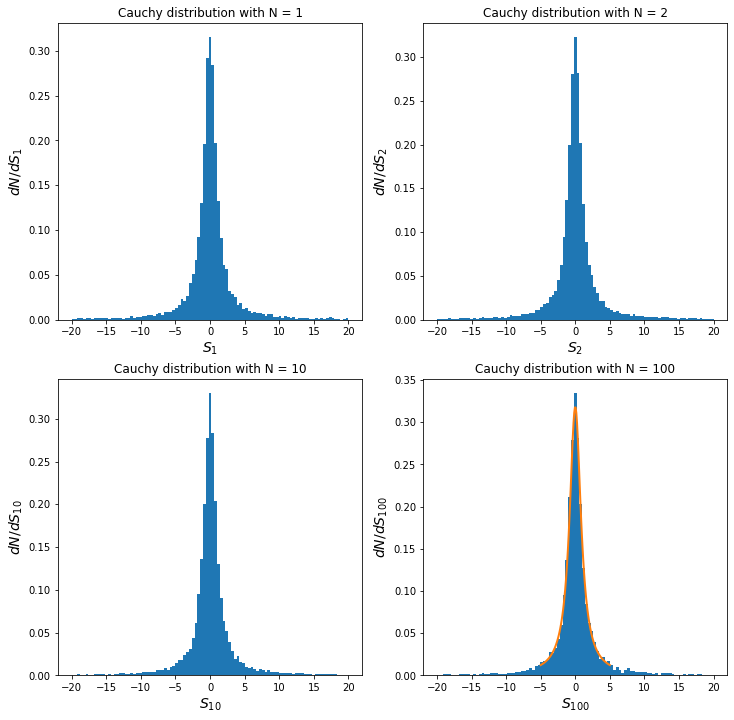

In [17]:
fig, axx = plt.subplots(2, 2,figsize=(12, 12))
axx = axx.reshape(-1)
bins = np.linspace(-20.,20.,100)

for k in range(4):
    ax = axx[k]
    ax.hist(cauchy[k], bins, density = True)
    ax.set_title(f"Cauchy distribution with N = {N[k]}")
    ax.set_xlabel(f"$S_{ {N[k]} }$")
    ax.set_ylabel(f"$dN/dS_{ {N[k]} }$")
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)

mu, width = 0.,1.
x = np.linspace(mu-5*width,mu+5*width,100)
ax.plot(x, stats.cauchy.pdf(x, mu, width), linewidth = 2)

### EX 01_3

In the last exercise, $\pi$ is computed simulating the Buffon's experiment.

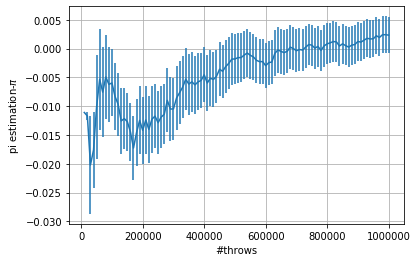

In [9]:
x, pi_est, pi_est_err = np.loadtxt("results/es01_3.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,pi_est,pi_est_err)
plt.xlabel('#throws')
plt.ylabel('pi estimation-$\pi$')
plt.grid(True)
plt.show()

The calculation of $\pi$ with the simulation of the Buffon's experiment has been carried out once again with the blocking method with $N_{thr} = 10^6$ throws and $N = 100$ blocks. The graph shows the compatibility of the calculation with the true value of $\pi$ as a function of the number of throws. For a high number of throws the discrepancy is clearly compatible with 0.

The tricky part of the exercise was to generate an angle (necessary to simulate the thread of the needle) without using $\pi$. For this, the following accept/reject method is sufficient. Generate a couple of uniformly random numbers $(x,y)$ each between 0 and 1 and accept only the ones inside the unitary circle ($x^2+y^2<=1$). The angle $\theta$ between the point in the plane and the x axis can be easily calculated as $\theta = \arccos(\frac{x}{\sqrt{(x^2+y^2)}})$. The angle is then multiplied by 4 to span all possible values between 0 and $2\pi$